<a href="https://colab.research.google.com/github/alok13/Machine-Learning/blob/master/Titanic_Classification_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

%tensorflow_version 2.x
import pandas as pd
import numpy as np



TensorFlow 2.x selected.


In [6]:
import os
os.environ['KAGGLE_USERNAME'] = "alok13" # username from the json file
os.environ['KAGGLE_KEY'] = "0a84636fc75d4a9f43d87644d220855d" # key from the json file
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.86MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 60.7MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 26.6MB/s]


In [7]:
titanic_df = pd.read_csv("train.csv")

titanic_Test_df = pd.read_csv("test.csv")

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
titanic_Test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [9]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
sum(pd.isnull(titanic_df['Age']))

177

In [11]:
some=sum(pd.isnull(titanic_df['Age']))/len(titanic_df['Age'])
round(some*100)

20

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Age')]

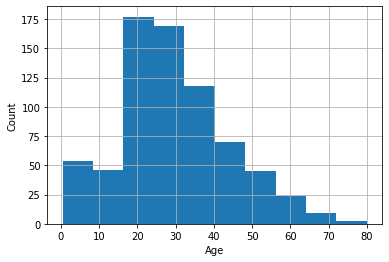

In [12]:
import matplotlib.pyplot as plt

data=titanic_df['Age'].hist()
data.set(xlabel='Age', ylabel='Count')

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values

In [13]:
titanic_df["Age"].median(skipna=True)

28.0

In [14]:
sum(pd.isnull(titanic_df['Cabin']))/len(titanic_df['Cabin'])

0.7710437710437711

We can ignore cabin values since most of them are missing.

In [15]:
sum(pd.isnull(titanic_df['Embarked']))/len(titanic_df['Embarked'])

0.002244668911335578

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Embarked')]

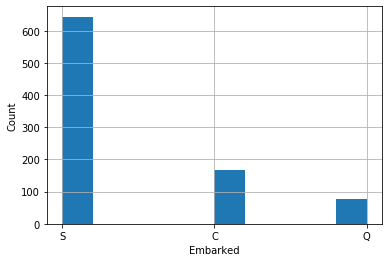

In [16]:
data1=titanic_df['Embarked'].hist()
data1.set(xlabel='Embarked', ylabel='Count')

I'll make the following changes to the data:

If "Age" is missing for a given row, I'll impute with 28 (median age).

If "Embark" is missing for a riven row, I'll impute with "S" (the most common boarding port).

I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with the passenger's class and fare paid.

In [0]:
train_data=titanic_df
train_data['Age'].fillna(28,inplace=True)
train_data['Embarked'].fillna("S",inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [0]:
train_data['TravelBuds']=train_data["SibSp"]+train_data["Parch"]
train_data['TravelAlone']=np.where(train_data['TravelBuds']>0,0,1)

In [0]:
train_data.drop('SibSp',axis=1, inplace=True)
train_data.drop('Parch',axis=1, inplace=True)
train_data.drop('TravelBuds',axis=1, inplace=True)

In [0]:
train2=pd.get_dummies(train_data, columns=["Pclass"])

In [0]:
train3=pd.get_dummies(train2,columns=["Embarked"])

In [0]:
train4=pd.get_dummies(train3,columns=["Sex"])
train4.drop('Sex_female', axis=1,inplace=True)

In [0]:
train4.drop('PassengerId', axis=1, inplace=True)
train4.drop('Name',axis=1,inplace=True)

In [24]:
train4.drop('Ticket',axis=1,inplace=True)
train4.head(5)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [0]:
df_final=train4

Clean and transform test data as well.

In [0]:
titanic_Test_df["Age"].fillna(28, inplace=True)
titanic_Test_df["Fare"].fillna(14.45, inplace=True)
titanic_Test_df.drop('Cabin', axis=1, inplace=True)

In [0]:
test_df=titanic_Test_df
test_df['TravelBuds']=test_df["SibSp"]+test_df["Parch"]
test_df['TravelAlone']=np.where(test_df['TravelBuds']>0, 0, 1)

test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('TravelBuds', axis=1, inplace=True)

test2 = pd.get_dummies(test_df, columns=["Pclass"])
test3 = pd.get_dummies(test2, columns=["Embarked"])

test4=pd.get_dummies(test3, columns=["Sex"])
test4.drop('Sex_female', axis=1, inplace=True)

test4.drop('PassengerId', axis=1, inplace=True)
test4.drop('Name', axis=1, inplace=True)
test4.drop('Ticket', axis=1, inplace=True)
final_test = test4

In [28]:
final_test.head(5)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


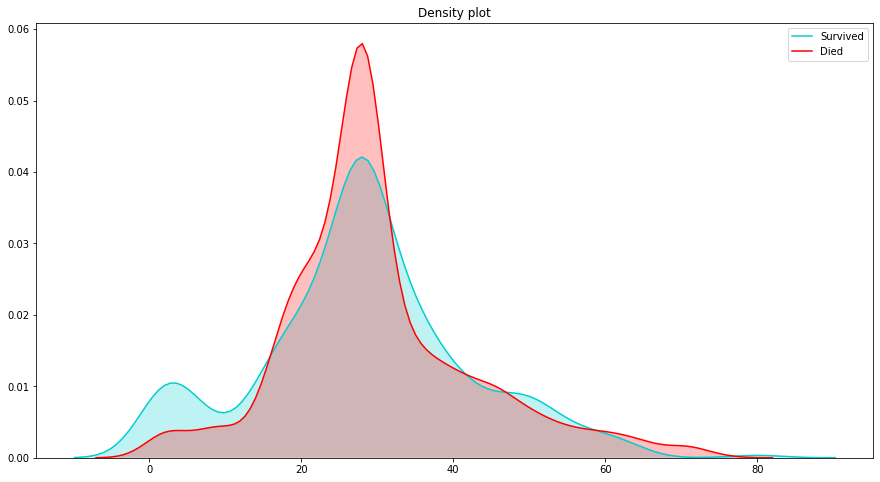

In [29]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.kdeplot(titanic_df["Age"][df_final.Survived==1], color="darkturquoise",shade=True)
sns.kdeplot(titanic_df["Age"][df_final.Survived==0], color="red",shade=True)

plt.legend(['Survived','Died'])
plt.title('Density plot')
plt.show()


The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

In [0]:
df_final['IsMinor']=np.where(train_data['Age']<=16,1,0)

final_test['IsMinor']=np.where(final_test['Age']<=16,1,0)

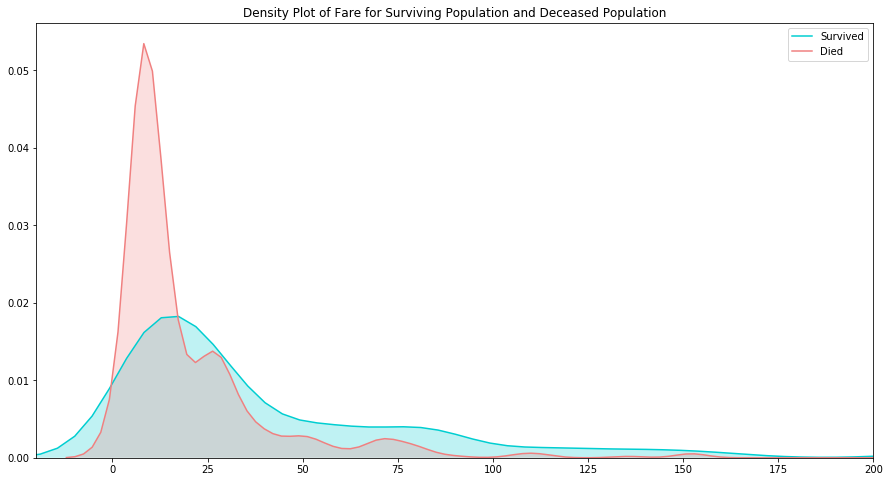

In [31]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next

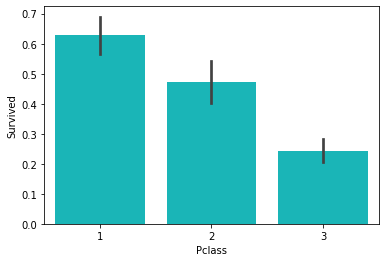

In [32]:
sns.barplot('Pclass', 'Survived', data=titanic_df, color="darkturquoise")
plt.show()

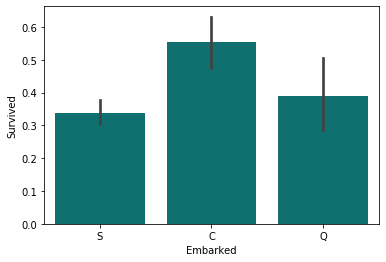

In [33]:
sns.barplot('Embarked', 'Survived', data=titanic_df, color="teal")
plt.show()

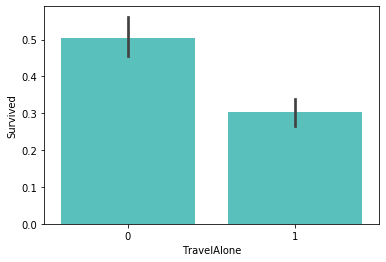

In [34]:
sns.barplot('TravelAlone', 'Survived', data=df_final, color="mediumturquoise")
plt.show()

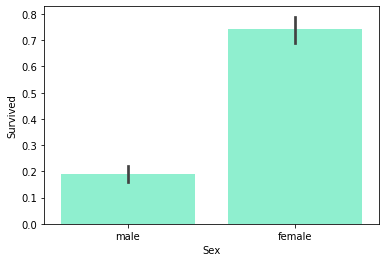

In [35]:
sns.barplot('Sex', 'Survived', data=titanic_df, color="aquamarine")
plt.show()

Logistic Regression and Results

In [0]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

In [37]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob=lambda chisq, dq : stats.chi2.sf(chisq,df)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450348
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Thu, 19 Dec 2019   Pseudo R-squ.:                  0.3237
Time:                        16:29:44   Log-Likelihood:                -401.26
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.627e-78
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0096      0.007     -1.372      0.170      -0.023       0.004
Fare            0.0018    

Removing "IsMinor" , "Fare" and "TravelAlone"

In [38]:
cols2=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"]  
X2=df_final[cols2]
Y=df_final['Survived']

logit_model=sm.Logit(Y,X2)
result=logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.458585
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Dec 2019   Pseudo R-squ.:                  0.3113
Time:                        16:29:44   Log-Likelihood:                -408.60
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.131e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0158      0.006     -2.602      0.009      -0.028      -0.004
Pclass_1       2.0449      0.

In [39]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X2,Y)

logreg.score(X2,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7934904601571269

In [0]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(df_final, test_size=0.2)

In [41]:
cols2=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"] 
X3=train[cols2]
Y3=train['Survived']
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X3, Y3)
logreg.score(X3, Y3)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.797752808988764

In [42]:
from sklearn import metrics

X3_test = test[cols2]
Y3_test = test['Survived']

Y3test_pred = logreg.predict(X3_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X3_test, Y3_test)))

Accuracy of logistic regression classifier on test set: 0.78


ROC AUC: 0.852


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


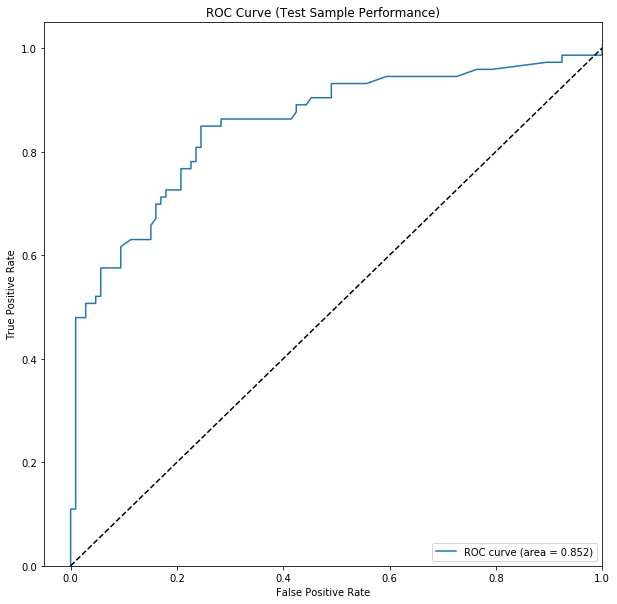

In [43]:
#Visualizing the model's ROC curve (**source for graph code given below the plot)
from sklearn.metrics import roc_curve, auc
logreg.fit(X3, Y3)

y_test = Y3_test
X_test = X3_test
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

Random Forest 


In [44]:
from sklearn.ensemble import RandomForestClassifier

cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

random_forest=RandomForestClassifier(n_estimators =100)
random_forest.fit(X,Y)
random_forest.score(X,Y)

0.9797979797979798

Decision Tree


In [0]:
from sklearn import tree
import graphviz
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)

In [46]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X_DT=df_final[cols]
Y_DT=df_final['Survived']

tree1.fit(X_DT, Y_DT)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

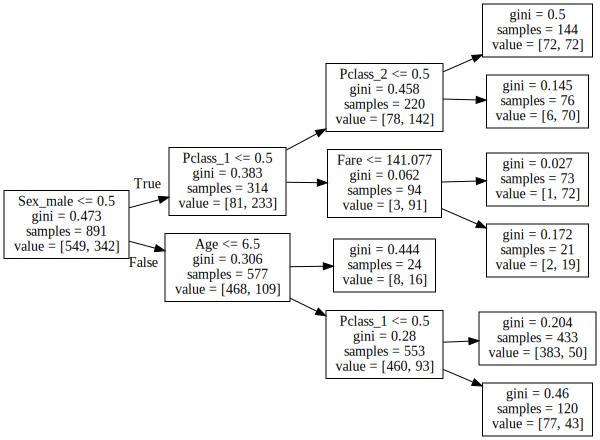

In [47]:
import graphviz 
tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names = X_DT.columns.values, rotate=True) 
tree1viz = graphviz.Source(tree1_view)
tree1viz

In [48]:
tree1.score(X_DT, Y_DT)

0.7957351290684624

Final Submission using Random Forest


In [0]:
final_test_RF=final_test[cols]
Y_pred_RF = random_forest.predict(final_test_RF)

In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_RF
    })
submission.to_csv('titanic.csv', index=False)